# 1 - Define the problem / Questions

# 2. Data Collections -

# 3 - Data Cleaning  -
- Handle missing values

- Identify and remove duplicates

- handle outliers

- Transform the data into suitable format

# 4- EDA - Exploratory Data Analysis.

# 5- Data Visualization -

# 6 - Analyze the insights & Report


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
#initial data inspection

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
#As we seen , the data contain some missing values.
#so lets check the exact number

In [7]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


#insights

- age - 177 missing values - should be imputed based on pclass or sex - replace by mean or median

- embarked - 2 missing values - can be filled with mode

- deck - massive missing values - better to drop this column


# .fillna()

# .dropna - .dop()

In [8]:
#fill with median age based on pclass & sex

In [9]:
titanic['age'] =titanic.groupby(['pclass', 'sex'])['age'].transform(lambda x : x.fillna(x.median()))

In [10]:
titanic['age'].isnull().sum()

0

In [11]:
#replace embark with mode

In [12]:
titanic['embarked'].mode()[0]

'S'

In [13]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)
#inplace = True is for permenent changes

<ipython-input-13-ad8b6e37aa77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)


In [14]:
titanic['embarked'].isnull().sum()

0

In [15]:
titanic.drop(columns=['deck'], inplace= True)

In [16]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [17]:
titanic.drop(columns=['who', 'embark_town', 'alive', 'adult_male'] , inplace= True)

In [18]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [19]:
titanic.shape

(891, 10)

After dropping unwanted columns the titanic dataset now has 891 rows describe the 891 passenger details and 10 columns which shows the passenger features.

In [20]:
#lets check for statistical summery of the data -

In [21]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537
mean,0.383838,2.308642,NaN,29.112424,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.304424,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,21.500000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


 - survival rate only 38% while 62% did not survived

- half of the passenger were in third class

- most passenger were young adult - median age = 26 year

- must be outlier in age shown 80 year old also

- median fare 14.45 but max was 512.33 - it also may contain outliers

-most passenger travel alone

- most passenger embarked from 'S'

- most passenger class is Third class

In [22]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


In [23]:
titanic.duplicated().sum()

118

In [24]:
titanic.drop_duplicates(inplace= True)

In [25]:
titanic.duplicated().sum()

0

In [26]:
titanic.shape

(773, 10)

In [27]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.25,S,Third,False


# EDA

In [28]:
#1 - What is the overall distribution of passengers across different classes (Pclass)?

In [29]:
titanic['pclass'].unique()

array([3, 1, 2])

In [30]:
pclass_count = titanic['pclass'].value_counts().sort_index()

In [31]:
pclass_count

,count
pclass,
1,209
2,164
3,400


In [32]:
pclass_count.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [33]:
pclass_count.values

array([209, 164, 400])

<ipython-input-34-2890497b755a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pclass_count.index, y = pclass_count.values ,


Text(0.5, 1.0, 'Distribution of passenger accross different Pclass')

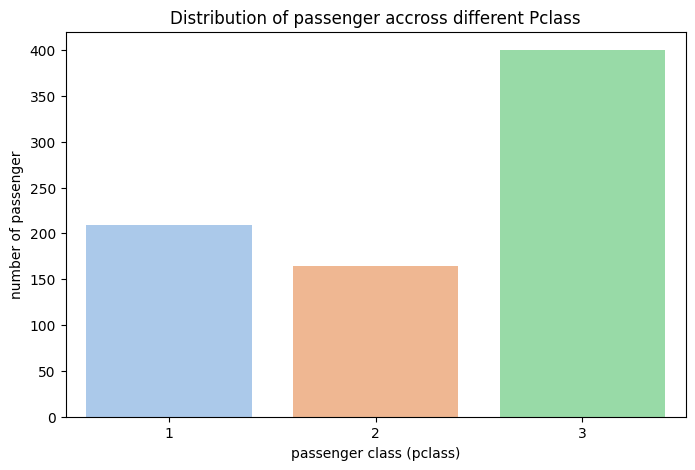

In [34]:
plt.figure(figsize= (8,5))
sns.barplot(x = pclass_count.index, y = pclass_count.values ,
            palette = 'pastel')
plt.xlabel("passenger class (pclass)")
plt.ylabel("number of passenger")
plt.title("Distribution of passenger accross different Pclass")

Insights from pclass distribution

- Majority of the passenger traveled in pclass3, indicating it was the most affordable and popular

- Pclass 1 had the least number of passenger , suggesting that fewer people could afford luxury travel

- pclass2 - had moderate number of passenger showing a middle class passenger presence on the titanic.

In [35]:
#2 - How is the age of passengers distributed?

Text(0.5, 1.0, 'Distribution of Passenger Ages on Titanic ')

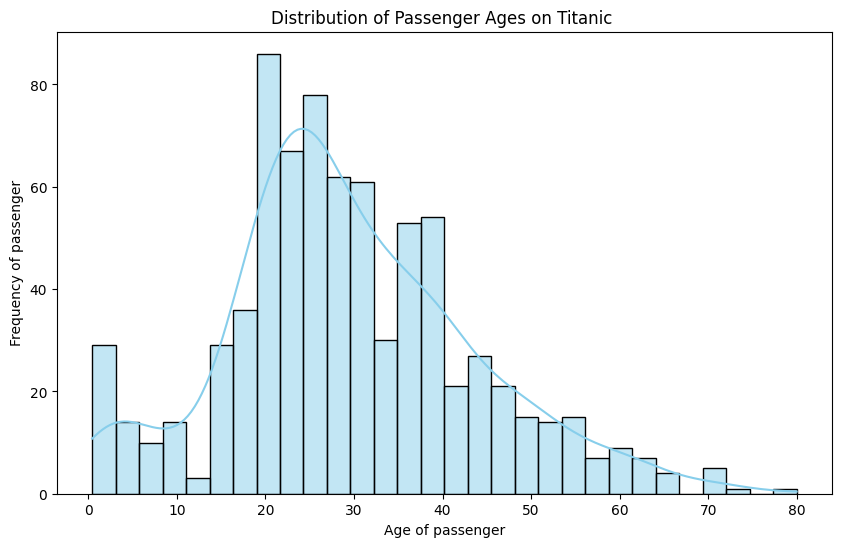

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic , x = 'age' , bins = 30,
             kde= True, color ='skyblue')
plt.xlabel("Age of passenger")
plt.ylabel("Frequency of passenger")
plt.title("Distribution of Passenger Ages on Titanic ")

Insights from age distribution

- The peak age group is 20-30 year . indicating many young adults traveled.

- there are fewer childresn (age < 10) and elderly (age > 60)  on board

- the age distributioin has a long tail on the right, indicating some passengers were much older (May be outlier) , not supposed to be board.

In [37]:
#3-What is the distribution of passengers based on Sex?

In [38]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [39]:
gender_count = titanic['sex'].value_counts()

In [40]:
gender_count

,count
sex,
male,482
female,291


In [41]:
gender_count.index

Index(['male', 'female'], dtype='object', name='sex')

In [42]:
gender_count.values

array([482, 291])

<ipython-input-43-f7ecc667f25b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_count.index, y = gender_count.values ,


Text(0.5, 1.0, 'Distribution of Passenger based on gender')

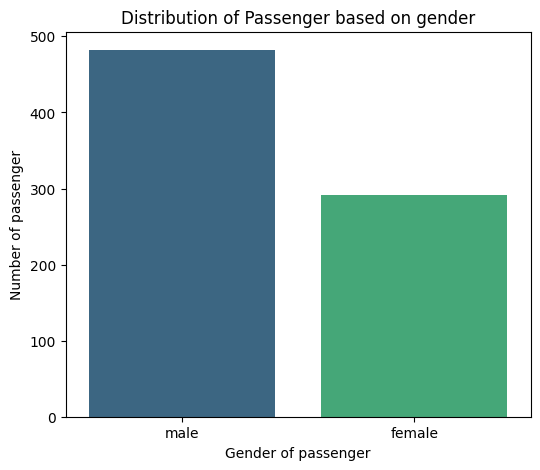

In [43]:
plt.figure(figsize=(6,5))
sns.barplot(x = gender_count.index, y = gender_count.values ,
            palette= 'viridis' )
plt.xlabel("Gender of passenger")
plt.ylabel("Number of passenger")
plt.title("Distribution of Passenger based on gender")

Insights from Gender Distribution

- The dataset shows more Male Passenger than Females

- Since the titanic was a mix emigrants , workers, healthly workers, men might have travled more for work and opportunity.

In [44]:
#4 How many passengers embarked from each port (Embarked)?

In [45]:
titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [46]:
# S - Southampton , C - Cherbourg , Q - Queenstown

In [47]:
embarked_count = titanic['embarked'].value_counts()

In [48]:
embarked_count

,count
embarked,
S,562
C,153
Q,58


<ipython-input-49-221eba30399c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_count.index, y =embarked_count.values,


Text(0.5, 1.0, 'Number of passenger embarked from each port')

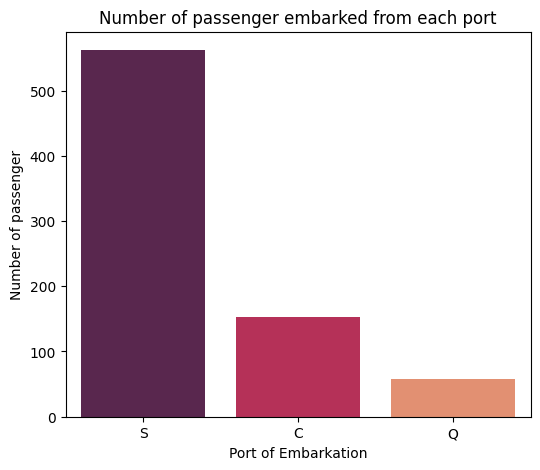

In [49]:
plt.figure(figsize= (6,5))
sns.barplot(x=embarked_count.index, y =embarked_count.values,
            palette= 'rocket')
plt.xlabel("Port of Embarkation")
plt.ylabel("Number of passenger")
plt.title("Number of passenger embarked from each port")

Insights from Embarked Distribution

- Manjority of passenger embarked from S - Southampton

- Moderate passenger embarked from C - Cherbourg

- Q - Queenstown had least number of passenger

In [50]:
# What is the survival rate overall, and how does it vary by Pclass?

In [51]:
overall_survival_rate = titanic['survived'].mean()*100

In [52]:
overall_survival_rate

41.52652005174644

In [53]:
survival_by_pclass = titanic.groupby('pclass')['survived'].mean()*100

In [54]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


In [55]:
survival_by_pclass.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [56]:
survival_by_pclass.values

array([64.11483254, 50.6097561 , 26.        ])

<ipython-input-57-b16b343fb9f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index , y = survival_by_pclass.values,


Text(0.5, 1.0, 'Survival Rate by Pclass')

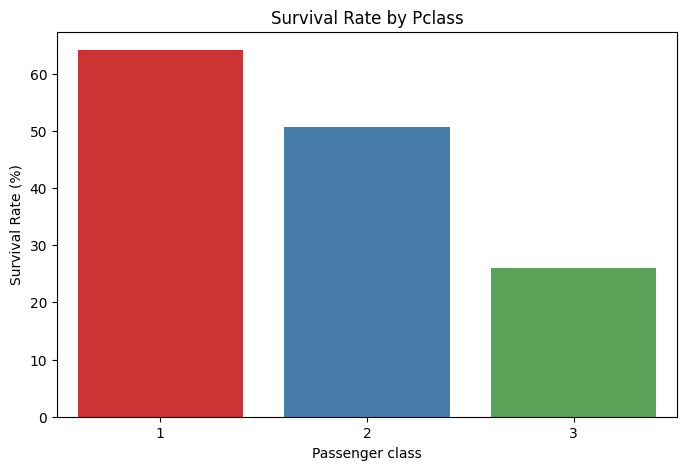

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_by_pclass.index , y = survival_by_pclass.values,
            palette= 'Set1')
plt.xlabel("Passenger class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Pclass")

Insighta on Surviaval rate by Pclass

- Only 41% of passenger survived, indicating a high fatality rate

- 1st class had highest survival rate ~ 64% ,passenger had better access to lifeboats and safety

-Moderate survival rate in 2nd class ~50% , some middle class passengers survived byt not as many as pclass1

-lowest survival rate in 3rd class - 26% , passenger due to fewer safety resourses.

In [58]:
#What is the survival rate for males vs. females?

In [59]:
survival_by_gender = titanic.groupby('sex')['survived'].mean()*100

In [60]:
survival_by_gender

,survived
sex,
female,73.883162
male,21.991701


<ipython-input-61-723dc8254068>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = survival_by_gender.index, y =survival_by_gender.values, palette='Set1' )


Text(0.5, 1.0, 'Survival Rate by Gender')

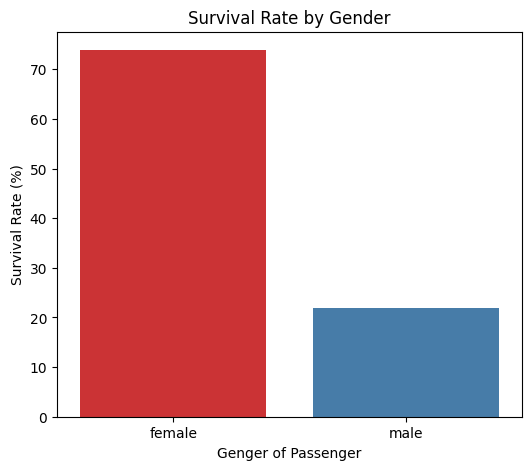

In [61]:
plt.figure(figsize=(6,5))
sns.barplot(x = survival_by_gender.index, y =survival_by_gender.values, palette='Set1' )
plt.xlabel("Genger of Passenger")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Gender")

Insights on Survival Rate By Gender

- Female had a much higher survival rate (~74%)
- Women were prioritized during evacuation
- Many first class & second class womens had a better access to lifeboats

-Males had very low survival rate (~21%%)
- Many men did not get lifeboats deu to evacuatioin policy.
-

In [62]:
survival_by_embarked = titanic.groupby("embarked")["survived"].mean() * 100

In [63]:
survival_by_embarked

,survived
embarked,
C,58.823529
Q,34.482759
S,37.544484


<ipython-input-64-3306ee99ea82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, palette="pastel")


Text(0.5, 1.0, 'Survival Rate by Embarkation Point')

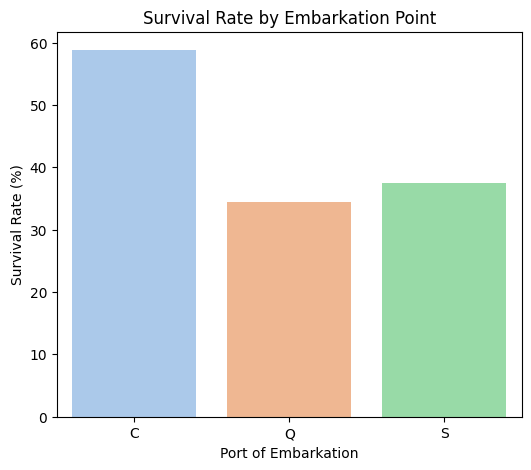

In [64]:
plt.figure(figsize=(6, 5))
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values, palette="pastel")

plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Embarkation Point")

Passengers from C (Cherbourg) had the highest survival rate (~58.8%)

-Many first-class passengers boarded from Cherbourg, leading to a higher survival rate.

-Southampton had the highest number of third-class passengers, which reduced survival chances.

-Most passengers from Queenstown were in third class, which had the worst survival rate.

In [65]:
#8 How does the survival rate vary across different ticket classes (Pclass)?

In [66]:
survival_by_pclass = titanic.groupby("pclass")["survived"].mean() * 100

In [67]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


<ipython-input-68-6d4d2056ae8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette="pastel")


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

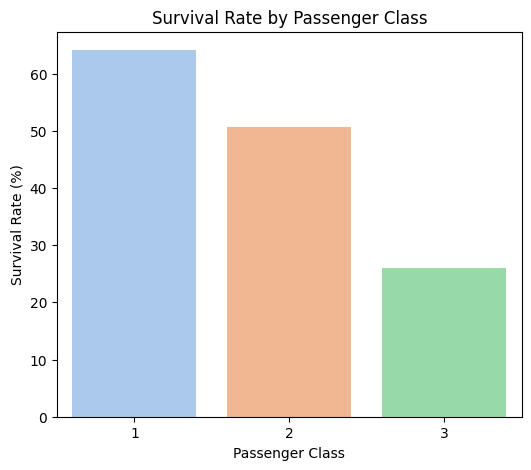

In [68]:
plt.figure(figsize=(6, 5))
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette="pastel")

plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Passenger Class")

First-Class (Pclass = 1) had the highest survival rate (~64.1%)

First-class passengers were given priority in lifeboats.
Many wealthier individuals had cabins near the deck, making evacuation easier.
Second-Class (Pclass = 2) had a moderate survival rate (~50.6%)

These passengers had a fair chance of survival but were not prioritized like first-class.
Third-Class (Pclass = 3) had the lowest survival rate (~26.0%)

Many third-class passengers were in the lower decks, making escape difficult.
Limited access to lifeboats contributed to a high fatality rate.

In [69]:
#9  Is there any relationship between the number of siblings/spouses aboard (SibSp) and survival?

In [70]:
survival_by_sibsp = titanic.groupby("sibsp")["survived"].mean() * 100

In [71]:
survival_by_sibsp

,survived
sibsp,
0,38.658777
1,53.000000
2,44.444444
3,28.571429
4,16.666667
5,0.000000
8,0.000000


<ipython-input-72-4f3655e02c5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values, palette="pastel")


Text(0.5, 1.0, 'Survival Rate by Sibsp')

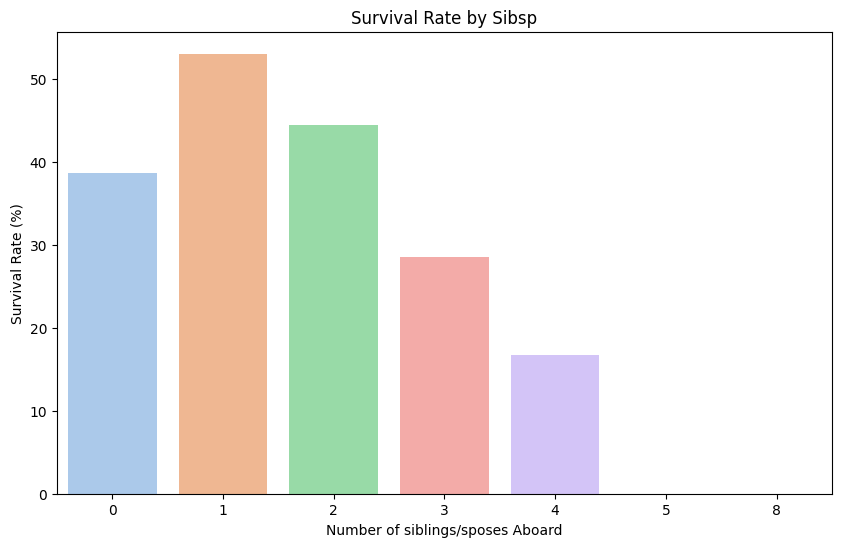

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_sibsp.index, y=survival_by_sibsp.values, palette="pastel")

plt.xlabel("Number of siblings/sposes Aboard")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Sibsp")

Best survival rate: Small families (1–2 SibSp).

Worst survival rate: Large families (3+ SibSp).

No survivors: Passengers with 5+ SibSp.

In [73]:
#  How does the number of parents/children aboard (Parch) affect survival?

In [74]:
survival_by_parch = titanic.groupby("parch")["survived"].mean() * 100

In [75]:
survival_by_parch

,survived
parch,
0,37.609842
1,55.263158
2,53.333333
3,60.000000
4,0.000000
5,20.000000
6,0.000000


<ipython-input-76-22c25f2417f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_parch.index, y=survival_by_parch.values, palette="pastel")


Text(0.5, 1.0, 'Survival Rate by Parch')

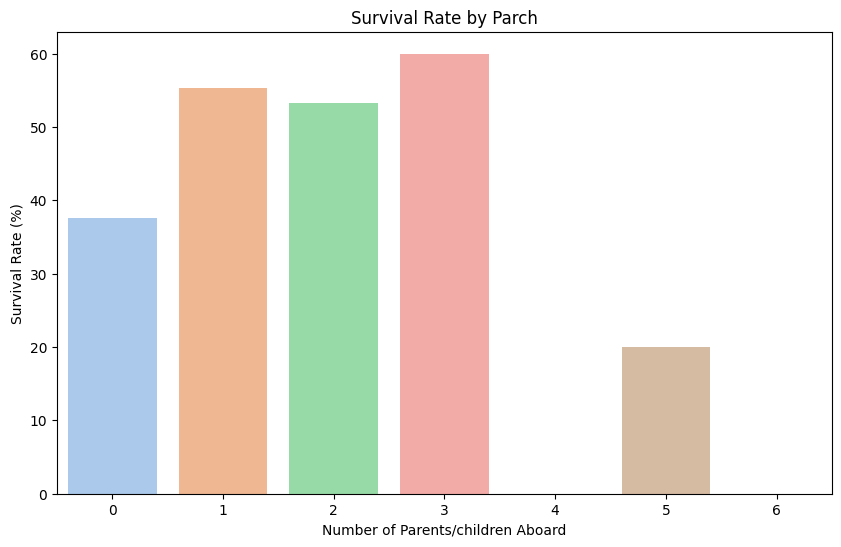

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_parch.index, y=survival_by_parch.values, palette="pastel")

plt.xlabel("Number of Parents/children Aboard")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Parch")

- Passengers with 1–3 Parents/Children Had Higher Survival Rates (~53–60%)

Families with small children or parents may have received priority during evacuation.
They likely got more assistance and access to lifeboats.

Passengers Traveling Alone (Parch = 0) Had Lower Survival (~37.6%)

Traveling alone reduced chances of getting help.
They were less likely to be prioritized.

- Passengers with 4+ Parch Had the Worst Survival Rates (0-20%)

Large families likely struggled to stay together.
Difficulty in securing spots for all members in lifeboats.
Parch = 4 & 6 had 0% survival, indicating entire families perished.

In [77]:
#How does the fare distribution vary across different passenger classes (Pclass)?

In [78]:
#lets check the fare distribution contain outlier or not with pclass

<ipython-input-79-4d0fde463e6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic, x='pclass', y ='fare', palette='pastel')


Text(0.5, 1.0, 'fare distribution accross passenger class')

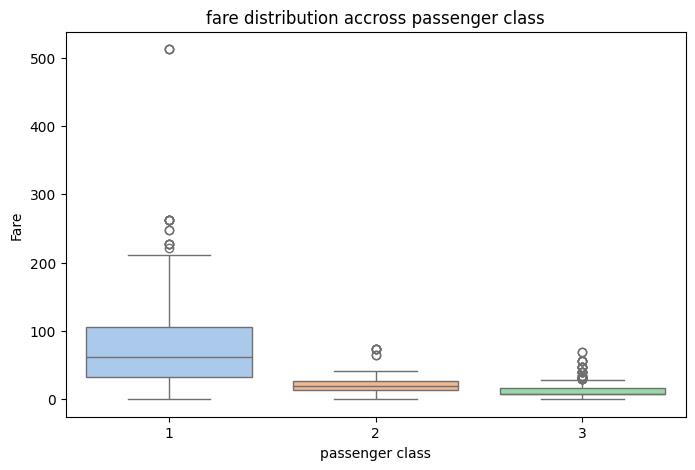

In [79]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic, x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

In [80]:
#as we seen the distribution contain the outliers. so lets check the outliers

In [81]:
titanic.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,209.0,86.000578,78.905683,0.0,32.3208,61.9792,106.425,512.3292
2,164.0,21.889279,13.498846,0.0,13.0000,18.7500,26.000,73.5000
3,400.0,13.733999,10.710465,0.0,7.7750,8.0500,15.900,69.5500


In [82]:
Q1 = titanic.groupby('pclass')['fare'].quantile(0.25)

In [83]:
Q2 = titanic.groupby('pclass')['fare'].quantile(0.50)

In [84]:
Q3 = titanic.groupby('pclass')['fare'].quantile(0.75)

In [85]:
IQR = Q3 - Q1

In [86]:
lower_bound  = Q1 - 1.5 * IQR

In [87]:
higher_bound = Q3 + 1.5 * IQR

In [88]:
higher_bound

,fare
pclass,
1,217.5813
2,45.5000
3,28.0875


Text(0.5, 1.0, 'Fare Distribution byb pclass')

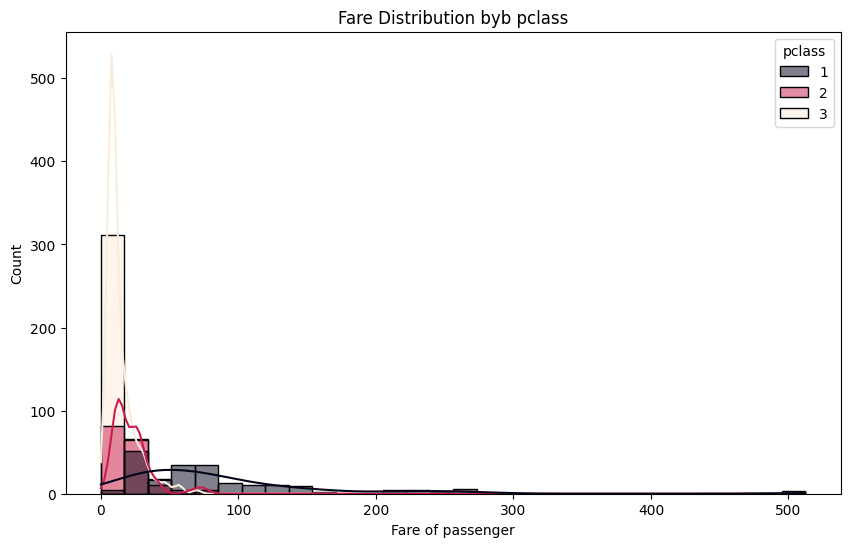

In [89]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic, x='fare', hue ='pclass', kde = True, bins = 30, palette='rocket')
plt.xlabel("Fare of passenger")
plt.ylabel("Count")
plt.title("Fare Distribution byb pclass")

#remove the fare outlier using regular one

In [90]:
Q1 = titanic['fare'].quantile(0.25)

In [91]:
Q3 = titanic['fare'].quantile(0.75)

In [92]:
IQR = Q3 - Q1

In [93]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [94]:
titanic_clean = titanic[(titanic['fare']>=lower_bound) & (titanic['fare']<= upper_bound)]

In [95]:
titanic_clean.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,112.0,39.568975,15.585120,0.0,26.550,34.8271,52.5542,71.2833
2,164.0,21.889279,13.498846,0.0,13.000,18.7500,26.0000,73.5000
3,400.0,13.733999,10.710465,0.0,7.775,8.0500,15.9000,69.5500


<ipython-input-96-3422d6c719d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic_clean, x='pclass', y ='fare', palette='pastel')


Text(0.5, 1.0, 'fare distribution accross passenger class')

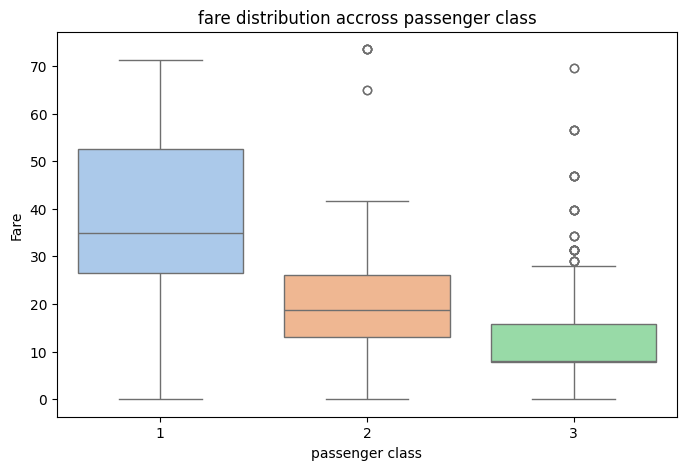

In [96]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic_clean, x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

Text(0.5, 1.0, 'Fare Distribution byb pclass')

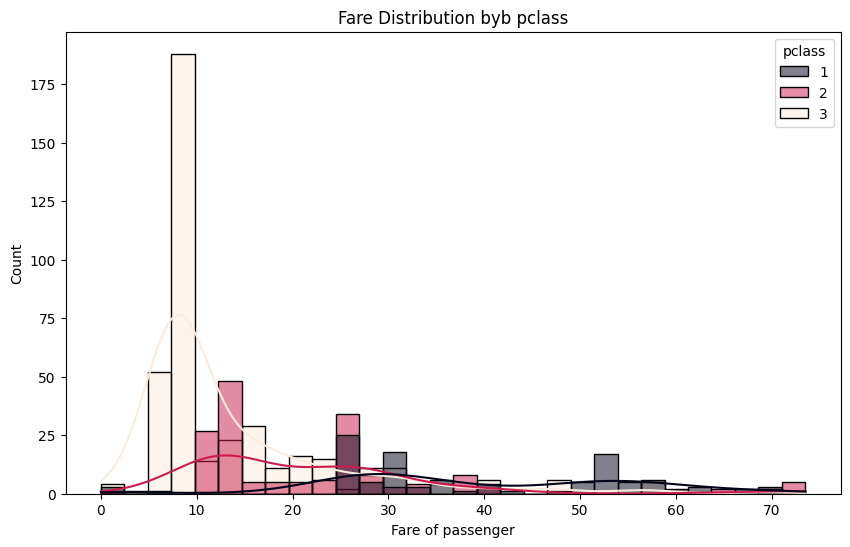

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic_clean, x='fare', hue ='pclass', kde = True, bins = 30, palette='rocket')
plt.xlabel("Fare of passenger")
plt.ylabel("Count")
plt.title("Fare Distribution byb pclass")

#way 1 - remove outliers by using def funcion

In [98]:
def remove_outliers(df, column, groupby_col):

  def iqr_outliers_removal(sub_df):
    Q1 = sub_df[column].quantile(0.25)
    Q3 = sub_df[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return sub_df[(sub_df[column] >= lower_bound) & (sub_df[column] <= upper_bound)]
  return df.groupby(groupby_col, group_keys=False).apply(iqr_outliers_removal)


titanic_new_clean = remove_outliers(titanic, 'fare', 'pclass')


<ipython-input-98-a3462c4e7d2c>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(groupby_col, group_keys=False).apply(iqr_outliers_removal)


<ipython-input-99-e050021b3d44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic_new_clean , x='pclass', y ='fare', palette='pastel')


Text(0.5, 1.0, 'fare distribution accross passenger class')

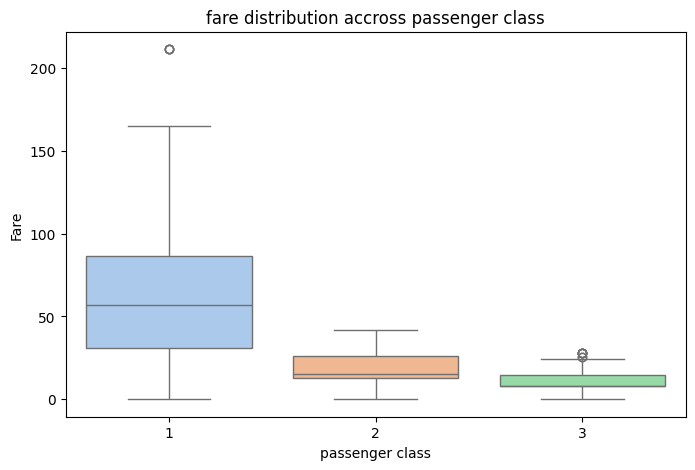

In [99]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic_new_clean , x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

#another way to remove outliers in fare by pclass

	fare
pclass
1	217.5813

2	45.5000

3	28.0875


In [100]:
upper_bond_dict = {1: 217.5813 , 2: 45.50, 3: 28.0875}

In [101]:
titanic['pclass'].unique()

array([3, 1, 2])

In [106]:
titanic_latest = titanic[
   ((titanic['pclass'] == 1) & (titanic['fare'] < upper_bond_dict[1])) |
    ((titanic['pclass'] == 2) & (titanic['fare'] < upper_bond_dict[2])) |
    ((titanic['pclass'] == 3) & (titanic['fare'] < upper_bond_dict[3]))
]

<ipython-input-107-64f5eee12d4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic_latest , x='pclass', y ='fare', palette='pastel')


Text(0.5, 1.0, 'fare distribution accross passenger class')

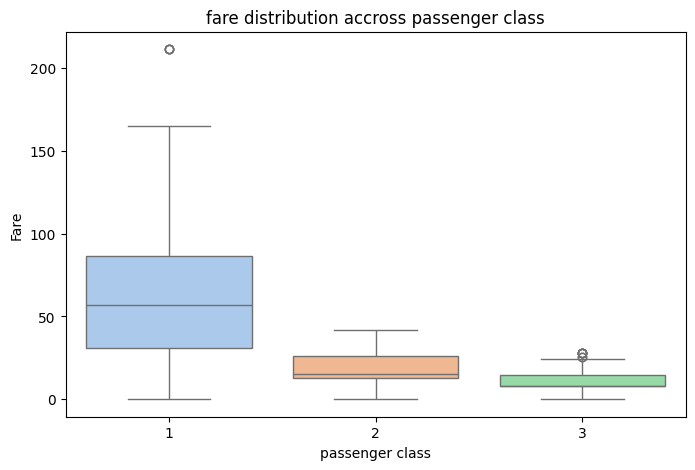

In [107]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic_latest , x='pclass', y ='fare', palette='pastel')
plt.xlabel("passenger class")
plt.ylabel("Fare")
plt.title("fare distribution accross passenger class")

<ipython-input-104-6ba6c722fcb6>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = titanic_clean, x='fare', kde = True, bins = 30, palette='rocket')


Text(0.5, 1.0, 'Fare Distribution byb pclass')

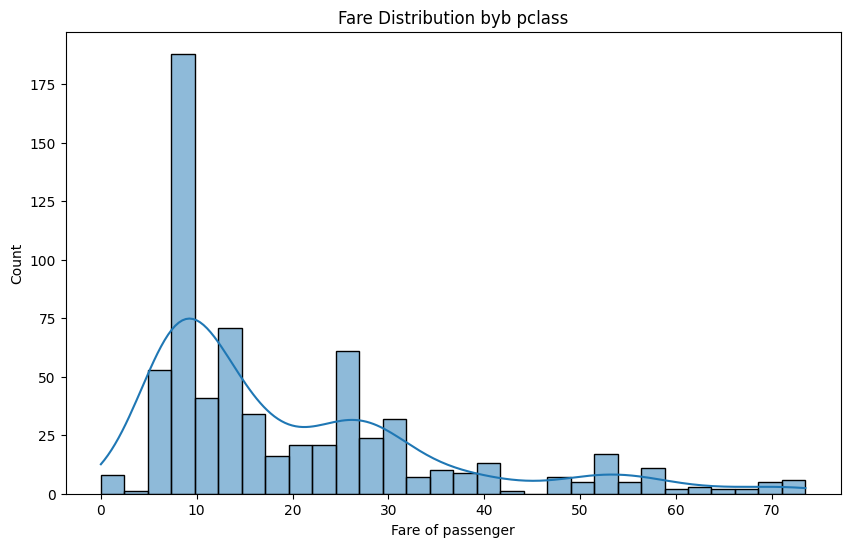

In [104]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic_clean, x='fare', kde = True, bins = 30, palette='rocket')
plt.xlabel("Fare of passenger")
plt.ylabel("Count")
plt.title("Fare Distribution byb pclass")

In [108]:
#12. What is the relationship between age and survival rates?

In [109]:
titanic['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 25.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 30.  , 31.  , 21.5 , 34.  ,
       15.  , 28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,
        3.  ,  7.  , 49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  ,
       17.  , 32.  , 16.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [110]:
#change this continuous feature into categorical

In [111]:
x = [0,10,20,30,40,50,60,70,80]

y = ['0-10', '11-20', '21-30','31-40','41-50','51-60', '61-70', '71-80']

In [112]:
titanic['age_group'] = pd.cut(titanic['age'], bins = x, labels = y)

In [114]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,False,21-30
1,1,1,female,38.0,1,0,71.2833,C,First,False,31-40
2,1,3,female,26.0,0,0,7.9250,S,Third,True,21-30
3,1,1,female,35.0,1,0,53.1000,S,First,False,31-40
4,0,3,male,35.0,0,0,8.0500,S,Third,True,31-40


In [115]:
age_survival = titanic.groupby('age_group')['survived'].mean()*100

<ipython-input-115-3188c01f1e72>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('age_group')['survived'].mean()*100


In [116]:
age_survival

,survived
age_group,
0-10,58.730159
11-20,40.366972
21-30,37.588652
31-40,46.511628
41-50,38.095238
51-60,40.476190
61-70,25.000000
71-80,20.000000


<ipython-input-117-b3276946148e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_survival.index, y=age_survival.values, palette='Set1' )


Text(0, 0.5, 'Survival rate in %')

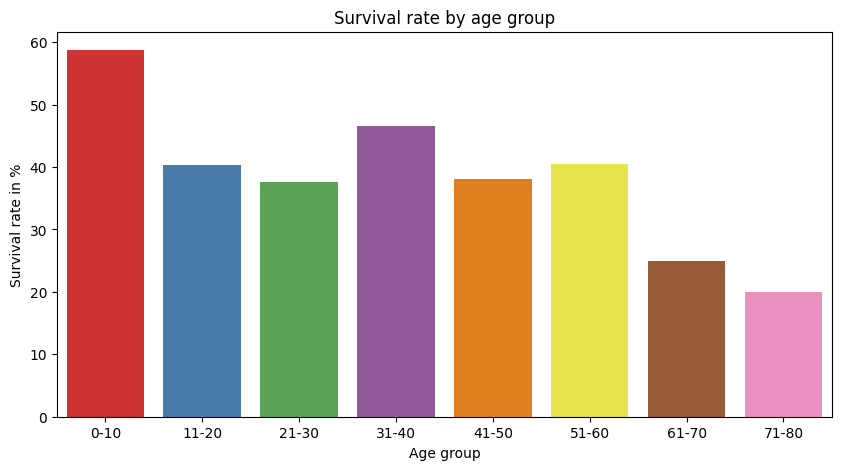

In [117]:
plt.figure(figsize=(10,5))
sns.barplot(x=age_survival.index, y=age_survival.values, palette='Set1' )
plt.title("Survival rate by age group")
plt.xlabel("Age group")
plt.ylabel("Survival rate in %")

- Childrden(0-10) had a highest survival rate ~ 58.73%

- Teenages (11-20) had lower survival rate than childrens ` 40.36%

-Adult (21-30)  had survival rate of ` 37%

middle age (31-60) approcx survial rate is better than adult - > 40%

Older adult & elderly passenger had lowest survival rate - likely struggled to reach lifeboars due to physical limitations.

In [118]:
#What is the correlation between Fare, Pclass, and survival?

In [119]:
corr_matrix = titanic[['fare', 'pclass', 'survived']].corr()

In [120]:
corr_matrix

,fare,pclass,survived
fare,1.000000,-0.554939,0.244176
pclass,-0.554939,1.000000,-0.336633
survived,0.244176,-0.336633,1.000000


Text(0.5, 1.0, 'correlation of Fare, Pclass & Survival')

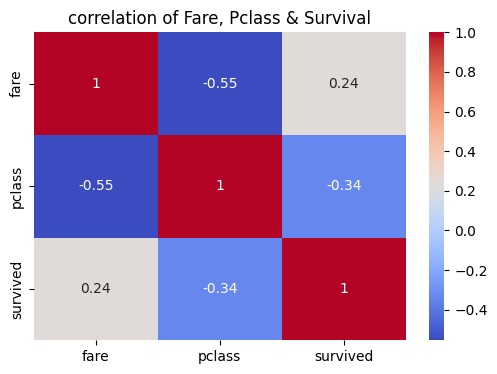

In [122]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm')
plt.title("correlation of Fare, Pclass & Survival")

- Fare and pclass had strong negative correlation - As pclass increases Fare decreases.

-Fare & survvial - weak positive correlation - passenger wgo paid higher fare had better chance to survived

-Pclass - Survival - Moderate negative correlation - lower class had low survival rate, upper class  had better survival rate

In [123]:
#14 What are the age ranges of survivors vs. non-survivors?

<ipython-input-124-cf83bd635c67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic, x='survived', y ='age', palette='pastel')


Text(0.5, 1.0, 'Age comparison of survival vs non survival')

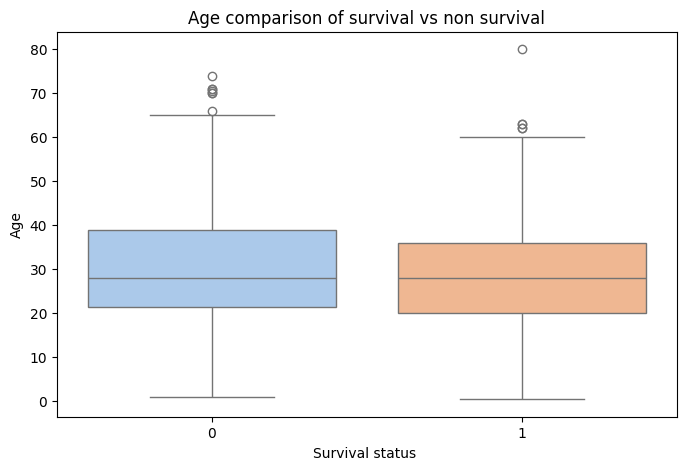

In [124]:
plt.figure(figsize =(8,5))
sns.boxplot(data = titanic, x='survived', y ='age', palette='pastel')
plt.xlabel("Survival status ")
plt.ylabel("Age")
plt.title("Age comparison of survival vs non survival")